<a href="https://colab.research.google.com/github/JRamos84/Hands-On-Machine-Learning/blob/main/Chapter_04_Training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Equación Normal

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m,1)
y = 4 + 3 * x + np.random.randn(m,1)

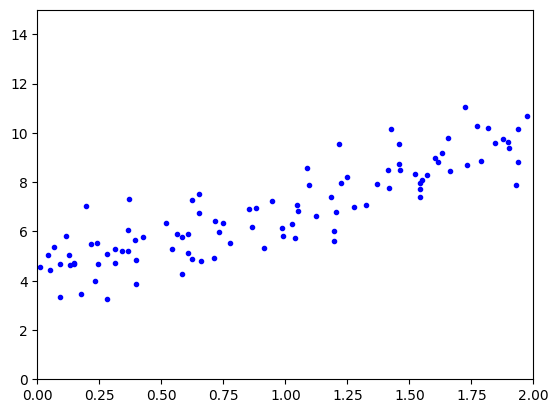

In [7]:
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [9]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(x)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [11]:
## Usando para hacer predicciones
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

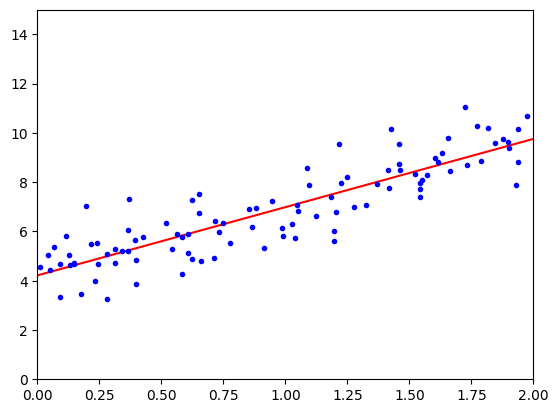

In [14]:
plt.plot(X_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [16]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Gradient Descent

In [18]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [19]:
theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent

In [21]:
n_epochs = 50
t0, t1 = 5,50

def learning_shedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_shedule(epoch * m + iteration)
    theta = theta - eta * gradients
theta


array([[4.21160403],
       [2.82291253]])

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1,n_iter_no_change=100,random_state=42)

sgd_reg.fit(x,y.ravel() )

SGDRegressor(eta0=0.1, n_iter_no_change=100, penalty=None, random_state=42)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.22612746]), array([2.79035392]))

## Mini-Batch Gradient Descent

## Regesión polinomial